In [14]:
import numpy as np
import pandas as pd
import os
from PyAstronomy.pyTiming import pyPeriod
import matplotlib
from AROMA import *
from AROMA.utils import *
from AROMA.config import *

import matplotlib.pyplot as plt

from astropy import units as u
from astropy.coordinates import SkyCoord, Distance
from astropy.io import fits
from astropy.table import QTable
from astropy.utils.data import download_file

from astroquery.gaia import Gaia
Gaia.ROW_LIMIT = 10000  # Set the row limit for returned data

def print_dict_levels(d, level=0):
    # Iterate over the items in the dictionary
    for key, value in d.items():
        # Print the name of the level and the key
        print("Level {}: {}".format(level, key))
        # If the value is a dictionary, recursively call the function
        if isinstance(value, dict):
            print_dict_levels(value, level+1)
            
import os
from os.path import join
array = os.path.abspath('').split('/')
homedir = '/'
for i in range(1,7):
   homedir = join(homedir, array[i])
homedir
plotPath=homedir+'/plots/'
plotPath

'/Users/nguyendat/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/plots/'

In [15]:
data = pd.read_csv(data_path, header=0, delimiter='\t')
plotPath = join(homedir, 'plots')

data = data # full light curve

time= np.array((data.TIME-2282.707750465)*24) # to hours
lc  = data.PSF_FLUX_NORM
elc = data.PSF_EFLUX
fit_dir = join(homedir,'notebooks', 'periodSineFit_metadata')
# fit_dir = '/Users/fuda/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/notebooks/periodSineFit_metadata/'

frequen = np.linspace(0.003,10.,100000)
luhclp = pyPeriod.Gls((time,lc,elc), norm="ZK", freq=frequen,ofac=10)
luhfr = clp.freq
luhpw = clp.power
luhhpp = 1./fr

In [16]:
### Background Light Curve
sourcesPath = "/Users/nguyendat/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/backgroundSourcesLightcurve/"

# Get a list of all the files in the directory
sourceFiles = os.listdir(sourcesPath)
#lc = {} # {source: [0: sector 36, 1: sector 37, 3: header]}

from collections import defaultdict
# Generate an empty nested dictionary with 2 levels using defaultdict
header = {}
lc = defaultdict(lambda: defaultdict(dict))
allTargets = []

headerstring = "TIME[d] TIMECORR[d] BEST_PHOT_FLUX_RAW BEST_PHOT_FLUX_COR ERR_BEST_PHOT_FLUX_RAW PSF_FLUX_RAW PSF_FLUX_COR QFIT_PSF_FLUX_RAW AP1_FLUX_RAW AP1_FLUX_COR ERR_AP1_FLUX_RAW AP2_FLUX_RAW AP2_FLUX_COR ERR_AP2_FLUX_RAW AP3_FLUX_RAW AP3_FLUX_COR ERR_AP3_FLUX_RAW AP4_FLUX_RAW AP4_FLUX_COR ERR_AP4_FLUX_RAW AP5_FLUX_RAW AP5_FLUX_COR ERR_AP5_FLUX_RAW MSK_FLUX_RAW MSK_FLUX_COR ERR_MSK_FLUX_RAW SKY_LOCAL X_POSITION Y_POSITION DQUALITY"
headers = headerstring.split()
name_list = []
# Iterate over the list of files
for file in sourceFiles:
    if '.txt' in file and 'pathos' in file:
        filename = file
        target = file.split('_')[3]
        name, sector = target.split('-')[1], target.split('-')[2]
        data_raw = pd.DataFrame()
        data_raw = pd.read_csv(sourcesPath+filename, names=headers, skiprows=26, sep='\s+')
        if 's036' == sector:
            lc[name][0] = data_raw
            with open(sourcesPath+filename) as f: 
                header[name] = f.readlines()[0:21]
                ra, dec = header[name][15][12:33], header[name][16][12:33]
                mag = header[name][18][11:33]
                allTargets.append([name, float(ra), float(dec)])
                lc[name]['ra'] = float(ra)
                lc[name]['dec'] = float(dec)
                lc[name]['mag'] = float(mag)
                print(name, ra, dec, mag)
                name_list.append(name)
        else:
            lc[name][1] = data_raw
            
# print_dict_levels(lc)
# print_dict_levels(header)

00119862172    162.3261875024635    -53.30967909851959                14.6313 
00119862113    162.3523383266405    -53.31959941763895                10.9028 
00119862176    162.3489930973609    -53.30935471739266                14.6232 
00119862180      162.35108525885    -53.30791138406632                11.7705 
00119862617    162.3765186168608    -53.24641699941681                10.4354 
00119862111    162.3122099194187    -53.32070147745477                16.0553 
00119862142    162.3394223549227    -53.31473352591125                15.0623 
00119788311    162.1805869347559    -53.35804350681344      9.055300000000001 
00119862086    162.3230507560907    -53.32334909757537                15.4608 
00119788211    162.1860927469322    -53.32792508971284                 7.9821 


In [17]:
# print(lc['00119862172']['ra'], lc['00119862172']['dec'], lc['00119862172']['mag']) 
# print(lc['00119862617']['ra'], lc['00119862617']['dec']) 
for name in name_list:
    for line in header[name][:2]: 
        print(line)
    print(30*'--')

# for line in header['00119862617']: print(line)
targetsInfo = pd.DataFrame(allTargets, columns=['name', 'ra', 'dec'])

# GAIAID  = ' 5353626607922101504' / Gaia DR3 identifier                         

# TICID   = ' 119862172'         / unique tess target identifier                 

------------------------------------------------------------
# GAIAID  = ' 5353625847691848192' / Gaia DR3 identifier                         

# TICID   = ' 119862113'         / unique tess target identifier                 

------------------------------------------------------------
# GAIAID  = ' 5353625955087289088' / Gaia DR3 identifier                         

# TICID   = ' 119862176'         / unique tess target identifier                 

------------------------------------------------------------
# GAIAID  = ' 5353625950770711424' / Gaia DR3 identifier                         

# TICID   = ' 119862180'         / unique tess target identifier                 

------------------------------------------------------------
# GAIAID  = ' 5353626539202665472' / Gaia DR3 identifier                         

# TICID  

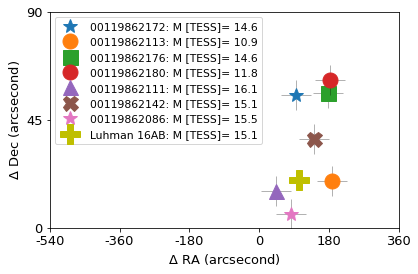

In [18]:
%matplotlib inline
# %matplotlib widget
# save = True
save = False

points = np.transpose([targetsInfo.ra, targetsInfo.dec])
skypoints = SkyCoord (points[:,0], points[:,1], unit='deg', frame='icrs')
markerStyles = ['*', 'o', 's', 'o', '*', '^', 'X', 'P', '*', 'o', 's']

luhman16coord = SkyCoord('10h49m18.91536s','-53d19m10.0776s', frame='icrs')

plt.rcParams.update({'font.size': 13})
fig, ax = plt.subplots(figsize=(6,4),
                       constrained_layout=False)
# ax.plot(skypoints.ra.degree, 
                # skypoints.dec.degree, ls='', marker='+', color='k', markersize=30, alpha=0.3)
sep, color, near = {}, {}, {}

for i,coord in enumerate(skypoints):
    
    targetIDname = targetsInfo.name.iloc[i]
    sep[targetIDname] = luhman16coord.separation(coord).arcsecond
    
    strLabel = targetIDname+r': M [TESS]= %.1f'%lc[targetIDname]['mag']
    if sep[targetIDname] < 200:
        ax.plot(coord.ra.degree, 
                    coord.dec.degree, ls='', marker='+', color='k', markersize=30, alpha=0.3)
        g = ax.plot(coord.ra.degree, 
                    coord.dec.degree, label=strLabel, marker=markerStyles[i], markersize=15, ls='')
        
        color[targetIDname]=g[0].get_color()
        near[targetIDname] = True
    else:
        near[targetIDname] = False
ax.plot(luhman16coord.ra.degree, 
                luhman16coord.dec.degree, label=r'Luhman 16AB: M [TESS]= 15.1', marker='P', markersize=20, lw=10, ls='', c='y')

ax.set_xlabel(r'$\Delta$ RA (arcsecond)')
ax.set_ylabel(r'$\Delta$ Dec (arcsecond)')
# ax.set_ulim
xtick = [162.15, 162.2, 162.25, 162.3, 162.35, 162.4]
deltax = [(162.15-162.3)*3600, (162.2-162.3)*3600, 
         (162.25-162.3)*3600, (162.3-162.3)*3600, 
         (162.35-162.3)*3600, (162.4-162.3)*3600]
ax.set_xticks([]), ax.set_xticks(xtick)
ax.set_xticklabels([int(np.ceil(v)) for v in deltax])

ytick = [-53.30, -53.3125, -53.325]
deltay = [(-53.30+53.325)*3600, (-53.3125+53.325)*3600, (-53.325+53.325)*3600]
ax.set_yticks([]), ax.set_yticks(ytick)
ax.set_yticklabels([int(np.floor(v)) for v in deltay])

plt.legend(fontsize="small")
plt.tight_layout()

if save:
    fig.savefig(plotPath+'backgroundSources_skycoord.png', dpi=300, bbox_inches = 'tight')
    fig.savefig(plotPath+'backgroundSources_skycoord.pdf', dpi=300, bbox_inches = 'tight')

No output of frequency error.
Increase frequency range to sample the peak maximum.
No output of frequency error.
Increase frequency range to sample the peak maximum.


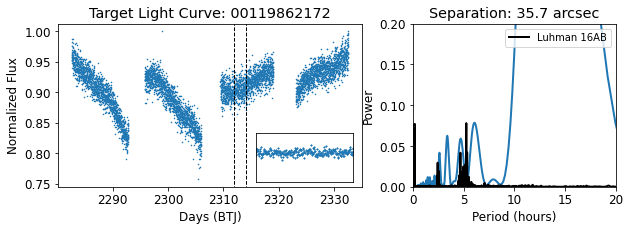

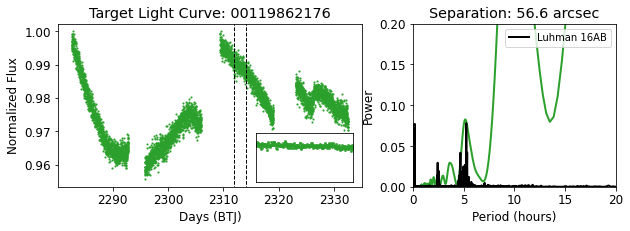

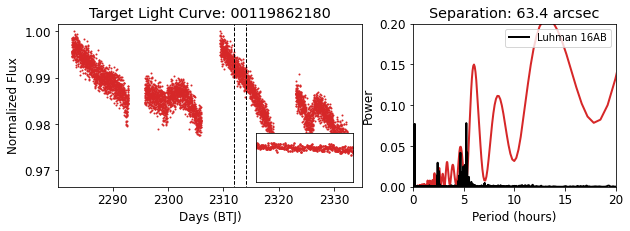

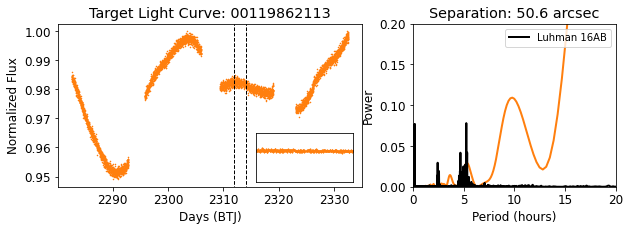

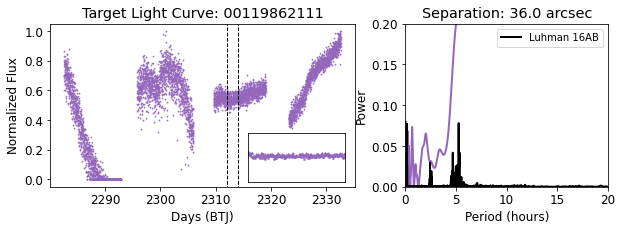

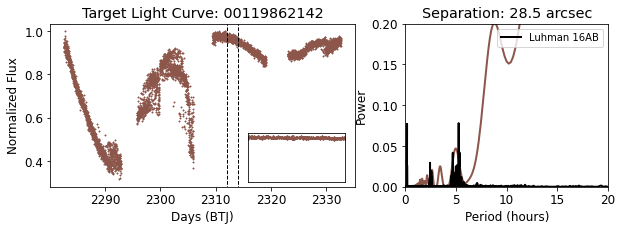

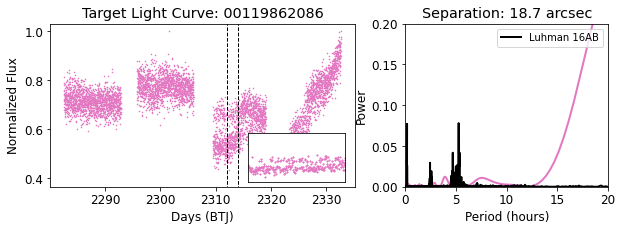

In [27]:
## PLOTTING
plt.close('all')
%matplotlib inline
# %matplotlib widget
matplotlib.rcParams.update({'font.size': 12})
import matplotlib
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
save = True
# save = False

for i,key in enumerate(lc):
    if near[key]:
        # print(key, lc[key]['ra'], lc[key]['dec'])
        RA, DEC, MAG = lc[key]['ra'], lc[key]['dec'], lc[key]['mag']
        s36raw = lc[key][0]
        s37raw = lc[key][1]

        ### Light curve cleaning: CORRECT METHOD
        skyLOCALnoise = 140 #(e s^-1)

        s36 = s36raw.query("DQUALITY == 0 & SKY_LOCAL<=%f & SKY_LOCAL>=%f"%(skyLOCALnoise, 50))
        sky36_threshold = s36.SKY_LOCAL.mean() + 4*s36.SKY_LOCAL.std()
        s36 = s36.query("SKY_LOCAL<=%f"%(sky36_threshold))

        s37 = s37raw.query("DQUALITY == 0 & SKY_LOCAL<=%f & SKY_LOCAL>=%f"%(skyLOCALnoise, 50))
        sky37_threshold = s37.SKY_LOCAL.mean() + 4*s37.SKY_LOCAL.std()
        s37 = s37.query("SKY_LOCAL<=%f"%(sky37_threshold))

        time0, lc0 = s36['TIME[d]'], s36['BEST_PHOT_FLUX_COR']
        lc0 = lc0/np.max(lc0)
        time1, lc1 = s37['TIME[d]'], s37['BEST_PHOT_FLUX_COR']
        lc1 = lc1/np.max(lc1)

        TIME = np.array(time0, time1)
        LC = np.array(lc0, lc1)

        lc[key]['norm'] = pd.DataFrame(np.transpose((TIME, LC, 0.045*LC)), columns=['TIME', 'FLUX', 'EFLUX'])

        # if i == 0:
        #     plt.figure(figsize=(15,5))
        #     plt.title('Target : %s, SEP: %.2f arcsec , RA: %.6f, DEC: %.6f, T-MAG: %.4f '%(key, sep[i], float(RA), float(DEC), float(MAG)))
        #     g = plt.plot(time0, lc0, c=color[i], ls='', marker=markerStyles[i])
        #     plt.plot(time1, lc1, c=color[i], ls='', marker=markerStyles[i])

        ## MAIN LIGHT CURVE PLOT
        fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10,3), gridspec_kw={'width_ratios': [1.5, 1]})
        
        # first insets
        mini_ax = plt.axes([0,0,1,1])
        ip = InsetPosition(ax0, [0.65,0.03,0.32,0.3])
        mini_ax.set_axes_locator(ip)
        plt.setp(mini_ax.spines.values(), color='k')
        
        # ax0.set_title('Target Light Curve: %s, SEP: %.2f arcsec , RA: %.6f, DEC: %.6f, T-MAG: %.4f '%(key, sep[key], float(RA), float(DEC), float(MAG)), fontsize=15)
        ax0.set_title('Target Light Curve: %s'%key)
        g = ax0.plot(time0, lc0, c=color[key], ls='', marker=markerStyles[i], ms=1.0)
        ax0.plot(time1, lc1, c=color[key], ls='', marker=markerStyles[i], ms=1.0)
        ax0.set_xlabel('Days (BTJ)'), ax0.set_ylabel('Normalized Flux')
        
        ax0.axvline(x=2312, ymin=-1, ymax=1, ls='--', lw=1, alpha=1.0, c='k')
        ax0.axvline(x=2314, ymin=-1, ymax=1, ls='--', lw=1, alpha=1.0, c='k')

        ## ZOOMED OUT PLOT
        mini_ax.plot(time0, lc0, c=color[key], ls='', marker=markerStyles[i], ms=1.5)
        mini_ax.plot(time1, lc1, c=color[key], ls='', marker=markerStyles[i], ms=1.5)
        mini_ax.set_xlim(2312, 2314), mini_ax.set_yticks([]), mini_ax.set_xticks([])
        mini_ax.autoscale
        # ax1.set_title('Day 2312-2314', fontsize=14)
        # ax0.add_patch(matplotlib.patches.Rectangle((2312,0.75), 0.5, 0.24, fill=None, edgecolor='k', lw=1))

        # plt.tight_layout()
        # ax1.set_xlabel('Days (BTJ)')

        ## Periodogram PLOT
        if key == '00119862111':
            light = lc['00119862111']['norm'].query('TIME>2295')
            time, flux, eflux = light.TIME, light.FLUX, light.EFLUX
        else:
            time, flux, eflux = lc[key]['norm'].TIME, lc[key]['norm'].FLUX, lc[key]['norm'].EFLUX
        
        frequen = np.linspace(0.0001,20.,10000)
        # Compute the GLS periodogram with default options.
        # Choose Zechmeister-Kuerster normalization explicitly
        clp = pyPeriod.Gls((time,flux,eflux), norm="ZK", freq=frequen,ofac=10)

        fr = clp.freq
        pw = clp.power
        hpp = 1./fr

        # fig2, axb = plt.subplots(figsize=(10,3))
        ax1.plot(hpp, pw, '-', linewidth=2.0, color=color[key], alpha=1.0), ax1.set_title('Periodogram', fontsize=15)
        ax1.plot(luhhpp, luhpw, '-', linewidth=2, color='k', label='Luhman 16AB')
        ax1.set_title('Separation: %.1f arcsec'%sep[key])
        ax1.set_ylabel('Power'), ax1.set_xlabel('Periods (Hours)')
        # plt.title('PERIODIOGRAM, Target : %s, SEP: %.2f arcsec, \nRA: %.6f, DEC: %.6f, T-MAG: %.4f '%(key, sep[i], float(RA), float(DEC), float(MAG)))
        ax1.set_xlim(0,20), ax1.set_xlabel('Period (hours)')
        ax1.set_ylim(0,0.2)
        ax1.legend(loc='upper right', fontsize=10)
    
        if save: 
            filename = '/%i_appendix_backgroundSources_%s'%(i+1, key)
            fig.savefig(plotPath+filename+'.png', dpi=300, bbox_inches = 'tight')
            fig.savefig(plotPath+filename+'.pdf', dpi=300, bbox_inches = 'tight')

In [26]:
plotPath


'/Users/nguyendat/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/plots'